In [14]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression #remember, this is linear regression model from sk-learn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [22]:
df = pd.read_csv('Assignment 2 - data Mashable.csv')
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


First, I want to get an overview of the data set. A scatter plot matrix would be nice but takes a very long time with this big data set. 

I calculate the correlations to see which variables to use

In [25]:
df.corr()

,id,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
id,1.000000,-0.006956,0.002121,-0.001707,-0.000009,-0.000347,-0.004579,0.007765,-0.004247,0.011212,...,-0.005510,0.004893,0.007751,0.009324,0.004155,-0.002630,-0.008384,-0.010912,-0.000407,-0.003900
n_tokens_title,-0.006956,1.000000,0.022547,0.000777,0.054971,-0.051485,-0.066005,0.148125,-0.015670,-0.089559,...,-0.004514,-0.018488,0.013699,-0.002890,-0.036779,-0.059906,0.075907,0.007217,0.011404,-0.012247
n_tokens_content,0.002121,0.022547,1.000000,0.357047,0.097596,0.130334,0.033232,0.055814,-0.007911,0.035805,...,-0.013674,0.030457,0.030348,0.044572,0.093424,0.014327,0.004364,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.000777,0.357047,1.000000,-0.073084,0.022387,0.001179,0.111108,-0.144599,-0.008554,...,-0.009555,0.027809,0.044483,0.053317,0.069931,0.014196,0.056100,0.046353,0.037395,0.085575
num_videos,-0.000009,0.054971,0.097596,-0.073084,1.000000,-0.006436,-0.047774,0.128427,-0.063903,-0.014793,...,0.011070,-0.009846,-0.012664,-0.016556,0.089470,-0.027871,0.058613,0.021671,0.025691,0.037147
average_token_length,-0.000347,-0.051485,0.130334,0.022387,-0.006436,1.000000,0.005017,-0.054350,0.063054,0.021908,...,0.004753,-0.019250,0.010608,-0.005759,0.523029,0.146979,-0.037501,-0.010083,-0.007094,-0.031730
data_channel_is_lifestyle,-0.004579,-0.066005,0.033232,0.001179,-0.047774,0.005017,1.000000,-0.110844,-0.105627,-0.061806,...,-0.001893,0.021400,0.034742,0.041413,0.054790,0.077873,-0.005399,0.034771,0.003820,0.036926
data_channel_is_entertainment,0.007765,0.148125,0.055814,0.111108,0.128427,-0.054350,-0.110844,1.000000,-0.202876,-0.118710,...,-0.005936,-0.015870,0.007414,-0.005749,0.027306,-0.044559,0.045334,-0.014189,-0.013069,-0.080967
data_channel_is_bus,-0.004247,-0.015670,-0.007911,-0.144599,-0.063903,0.063054,-0.105627,-0.202876,1.000000,-0.113122,...,-0.014950,-0.044736,-0.025853,-0.051383,-0.046447,0.063373,-0.040481,0.017209,-0.004352,-0.033469
data_channel_is_socmed,0.011212,-0.089559,0.035805,-0.008554,-0.014793,0.021908,-0.061806,-0.118710,-0.113122,1.000000,...,0.000117,0.010063,-0.011666,-0.001594,0.026838,0.058003,-0.013620,0.024063,0.004336,0.085516


Overall, the correlations are not too high. I take the highest numbers of the row *shares_log*.

The highest value is *is_weekend* with 0.105919. This eliminates the possibility of using the other dummy variables. \
*data_channel_is_socmed*	also scores high with 0.085516.\
*data_channel_is_entertainment* has -0.080967.\
*num_imgs* has 0.085575.\
At last, *global_subjectivity* has 0.093021. 

These are the values I will choose for my prediction.


### I create separate X and Y that include only the variables that we want to use.

In [44]:
y = df['shares_log'] 
X = df[['is_weekend', 'data_channel_is_socmed', "data_channel_is_entertainment", "num_imgs", "global_subjectivity"]]
X.index = df['id'] #for the purpose of the assignment, I link them to ID. If you want to take a deeper look into the specific articles, url can also be used.
X.head()

,is_weekend,data_channel_is_socmed,data_channel_is_entertainment,num_imgs,global_subjectivity
id,,,,,
1,0,0,0,12,0.439379
2,0,0,0,6,0.300454
3,0,0,0,0,0.575486
4,0,0,0,2,0.327220
5,0,0,0,18,0.507709


In [52]:
# Checking if I can make the scatterplot Matrix again with only these variables, but it still takes too long... 
variables = df[['shares_log', 'is_weekend', 'data_channel_is_socmed', "data_channel_is_entertainment", "num_imgs", "global_subjectivity"]]

# sns.pairplot(df)
# plt.show()

I make a new row for the prediction (use the df again, otherwise it gets confusing)

In [66]:
df['shares_log_prediction'] = lm.predict(X) 
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log,shares_log_prediction
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219,3.273204
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751,3.206291
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091,3.265206
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030,3.197970
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151,3.318658


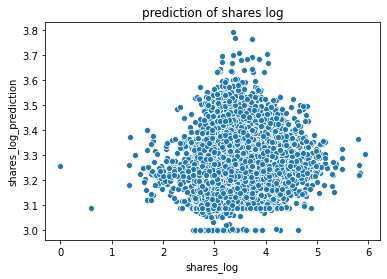

In [70]:
sns.scatterplot(x='shares_log', y='shares_log_prediction',  data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('shares_log')
plt.ylabel('shares_log_prediction')
plt.title('prediction of shares log')
plt.show()

I will split the model into training data and test data. The prediction will be based on the training data, and apply on the test data.

In [30]:
# 70% = training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
X_train.head()

,is_weekend,data_channel_is_socmed,data_channel_is_entertainment,num_imgs,global_subjectivity
id,,,,,
20922,1,0,0,0,0.451711
4486,0,0,0,9,0.476976
17756,0,0,0,1,0.488495
4705,0,0,0,23,0.545746
13494,0,0,0,13,0.507042


In [32]:
#create the model
lm = LinearRegression() 

#train the model
model = lm.fit(X_train, y_train) 

Now I create a dataframe with the coefficients

In [33]:
coef = pd.DataFrame(X.columns.values, lm.coef_) 
coef

,0
0.125883,is_weekend
0.117692,data_channel_is_socmed
-0.089712,data_channel_is_entertainment
0.004114,num_imgs
0.303963,global_subjectivity


If the article is published in a weekend, the shares_log goes up with 0.12. \
If the data channel is socmed, the shares_log goes up with 0.11. \
If the data channel is entertainment, the shares_log goes down with 0.08. \
If the article contains images, the shares_log goes up with 0.04. \
If the article has global_subjectivity, the shares_log goes up with 0.0.3. 

Now I generate predictions for the test data. So I use X.test, not X.train

In [36]:
y_test_p = lm.predict(X_test) 
r2_score(y_test, y_test_p)

0.03925705298116455

The R^2 is 0.04, which means 4% of the variation in shares is explained by the model. That's not very good! Now I will calculate the RMSE: the root mean squared error.

In [37]:
math.sqrt(mean_squared_error(y_test, y_test_p))


0.3979819874694508


The RMSE is 0.39. Which means that we are typically about 0.4 off in our predicted rating (which goes from 0-10). 

Let's visualize and see how the prediction is.

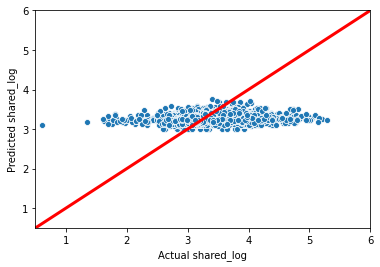

In [65]:
sns.scatterplot(y_test, y_test_p)
range1 = 6
plt.xlabel('Actual shared_log')
plt.ylabel('Predicted shared_log')
plt.xlim([0.5,range1]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([0.5,range1])
plt.plot([0.5,range1], [0.5,range1], color='red', lw=3) #Plot a diagonal length
plt.show()

It does not seem very linear. the prediction shares log is around 3, with more outliers in the middle of the plot. The actiual sharing is more spread out.
I don't think this prediction is very well. 